## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [156]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())



In [2]:
pwd

'C:\\Users\\felip\\flatiron-ds-course\\section11-mod-1-project\\Master\\movie-analysis-project'

In [2]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [21]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
from glob import glob

In [4]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [5]:
type(csv_files)
d = {}

In [6]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [7]:
d.keys()

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])

In [27]:
d['./zippedData\\imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [8]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [9]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [10]:
import sqlite3

In [11]:
conn = sqlite3.connect("movies_db.sqlite")

In [13]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [14]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross_gz
Table 'bom_movie_gross_gz' already exists.
could not make table imdb_name_basics_gz
Table 'imdb_name_basics_gz' already exists.
could not make table imdb_title_akas_gz
Table 'imdb_title_akas_gz' already exists.
could not make table imdb_title_basics_gz
Table 'imdb_title_basics_gz' already exists.
could not make table imdb_title_crew_gz
Table 'imdb_title_crew_gz' already exists.
could not make table imdb_title_principals_gz
Table 'imdb_title_principals_gz' already exists.
could not make table imdb_title_ratings_gz
Table 'imdb_title_ratings_gz' already exists.
could not make table tmdb_movies_gz
Table 'tmdb_movies_gz' already exists.
could not make table tn_movie_budgets_gz
Table 'tn_movie_budgets_gz' already exists.


In [15]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

In [16]:
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None
================End DF===============
===============New DF===============
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
================End DF===============
===============New DF===============
imdb_title_akas_gz
<class '

In [17]:
filt = csv_files_dict['tmdb_movies_gz'].duplicated()
index_to_drop = csv_files_dict['tmdb_movies_gz'].loc[filt].index

csv_files_dict['tmdb_movies_gz'].drop(index=index_to_drop, inplace=True)

In [18]:
def clean_genre_string(genre_string):
    genre_string = genre_string.replace('[', '')
    genre_string = genre_string.replace(']', '')
    genre_string = genre_string.replace(',', '')
    genre_string = list(genre_string.split())
    genre_string_list = []
    for i in genre_string:
        genre_string_list.append(int(i))
    return genre_string_list

In [19]:
csv_files_dict['tmdb_movies_gz'].genre_ids = csv_files_dict['tmdb_movies_gz'].genre_ids.apply(clean_genre_string)
csv_files_dict['tmdb_movies_gz'].head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [151]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

In [22]:
csv_files_dict['tmdb_movies_gz'] = csv_files_dict['tmdb_movies_gz'].set_index('original_title')

In [24]:
csv_files_dict['tn_movie_budgets_gz'].rename(columns={'movie' : 'original_title'}, inplace=True)
csv_files_dict['tn_movie_budgets_gz'] = csv_files_dict['tn_movie_budgets_gz'].set_index('original_title')

In [28]:
df_tn_movie_budgets = csv_files_dict['tn_movie_budgets_gz']
df_tn_movie_budgets.head(3)

,release_date,production_budget,domestic_gross,worldwide_gross
original_title,,,,
Avatar,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"


In [79]:
df_tmdb_movies_gz = csv_files_dict['tmdb_movies_gz']
df_tmdb_movies_gz.head(3)

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
original_title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
Iron Man 2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368


In [131]:
df_tn_movie_budgets.head(3)

,release_date,production_budget,domestic_gross,worldwide_gross
original_title,,,,
Avatar,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"


In [151]:
def string_to_float(dataseries):
    cleaned = dataseries.str.replace('$','')
    cleaned = cleaned.str.replace(',','')
    cleaned = cleaned.astype(float)
    return cleaned

In [154]:
df_joined = df_tn_movie_budgets.join(df_tmdb_movies_gz, lsuffix='_X', rsuffix='_Y')
df_joined['profit'] = string_to_float(df_joined['worldwide_gross']) - string_to_float(df_joined['production_budget'])

In [163]:
df_joined.genre_ids.isin()

original_title
#Horror                       [18, 9648, 27, 53]
(500) Days of Summer                         NaN
10 Cloverfield Lane                [53, 878, 18]
10 Days in a Madhouse                       [18]
10 Things I Hate About You                   NaN
Name: genre_ids, dtype: object

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

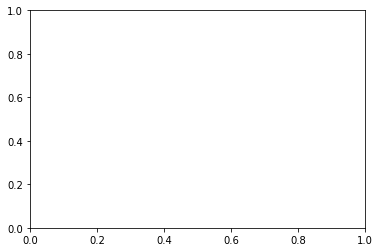

In [161]:
x = df_joined.genre_ids.apply()
plt.bar(df_joined.genre_ids, df_joined['profit'])